## Análise Exploratória dos Dados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.ticker import EngFormatter

from scipy.stats import mannwhitneyu

from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.models import RANDOM_STATE

sns.set_theme(palette="bright")

In [2]:
df = pd.read_csv(DADOS_ORIGINAIS)

In [3]:
with pd.option_context("display.max_columns", 35):
    display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
with pd.option_context('float_format', '{:.2f}'.format, "display.max_columns", 35):
    display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Média de todos os dados estão centralizadas em zero, mas os mínimos e máximos não seguem padrão.

In [7]:
# df.describe(exclude='number') não possui colunas categóricas

#### Analisando quantidade de valores por coluna

In [8]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [9]:
df.nunique()[df.nunique()==1]     # Vendo as colunas que tem apenas valor único

Series([], dtype: int64)

#### Analisando a proporção dos dados da coluna 'Class', que é o target do nosso estudo

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

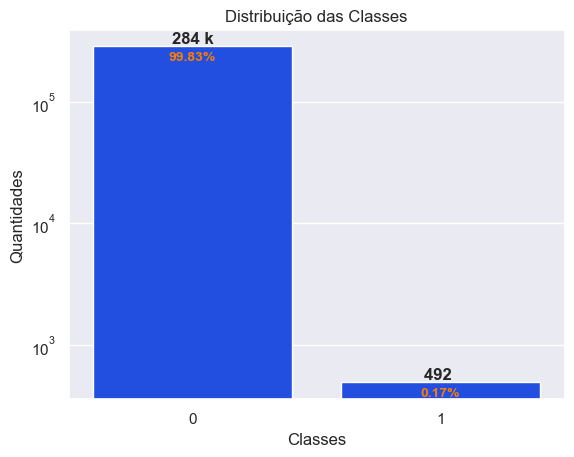

In [12]:
from matplotlib.ticker import EngFormatter

fig, ax = plt.subplots()

sns.countplot(data=df, x='Class', ax=ax)

eng_fmt = EngFormatter(places=0)            # places=0 é pra não ter nenhuma casa decimal
ax.yaxis.set_major_formatter(eng_fmt)

ax.set_yscale('log')          # Mudando a escala do eixo Y para logarítma (se não nem veríamos a classe 1 no gráfico com escala normal)

ax.bar_label(
    ax.containers[0],
    label_type='edge',
    weight='bold',
    labels= map(eng_fmt.format_eng, df['Class'].value_counts())
)

ax.bar_label(
    ax.containers[0],
    label_type='edge',
    weight='bold',
    labels= map(lambda num: f"{num:.2%}", df['Class'].value_counts(normalize=True)),
    padding = -12,                                                                     # Pra não ficar sobreposto com a legenda dos valores absolutos acima,
    fontsize=10,
    color='C1'
)

ax.set_title('Distribuição das Classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Quantidades')

plt.show()

#### Analisando valores nulos e duplicados

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.duplicated().sum()

1081

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
df[ df == 0 ].count()

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

Veja que algumas transações tem valor igual a 0 (não é nulo). É estranho ter transações zero.

#### Análises Gráficas

C:\Users\brcprrcchave\AppData\Local\Temp\ipykernel_19360\3631180976.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\brcprrcchave\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


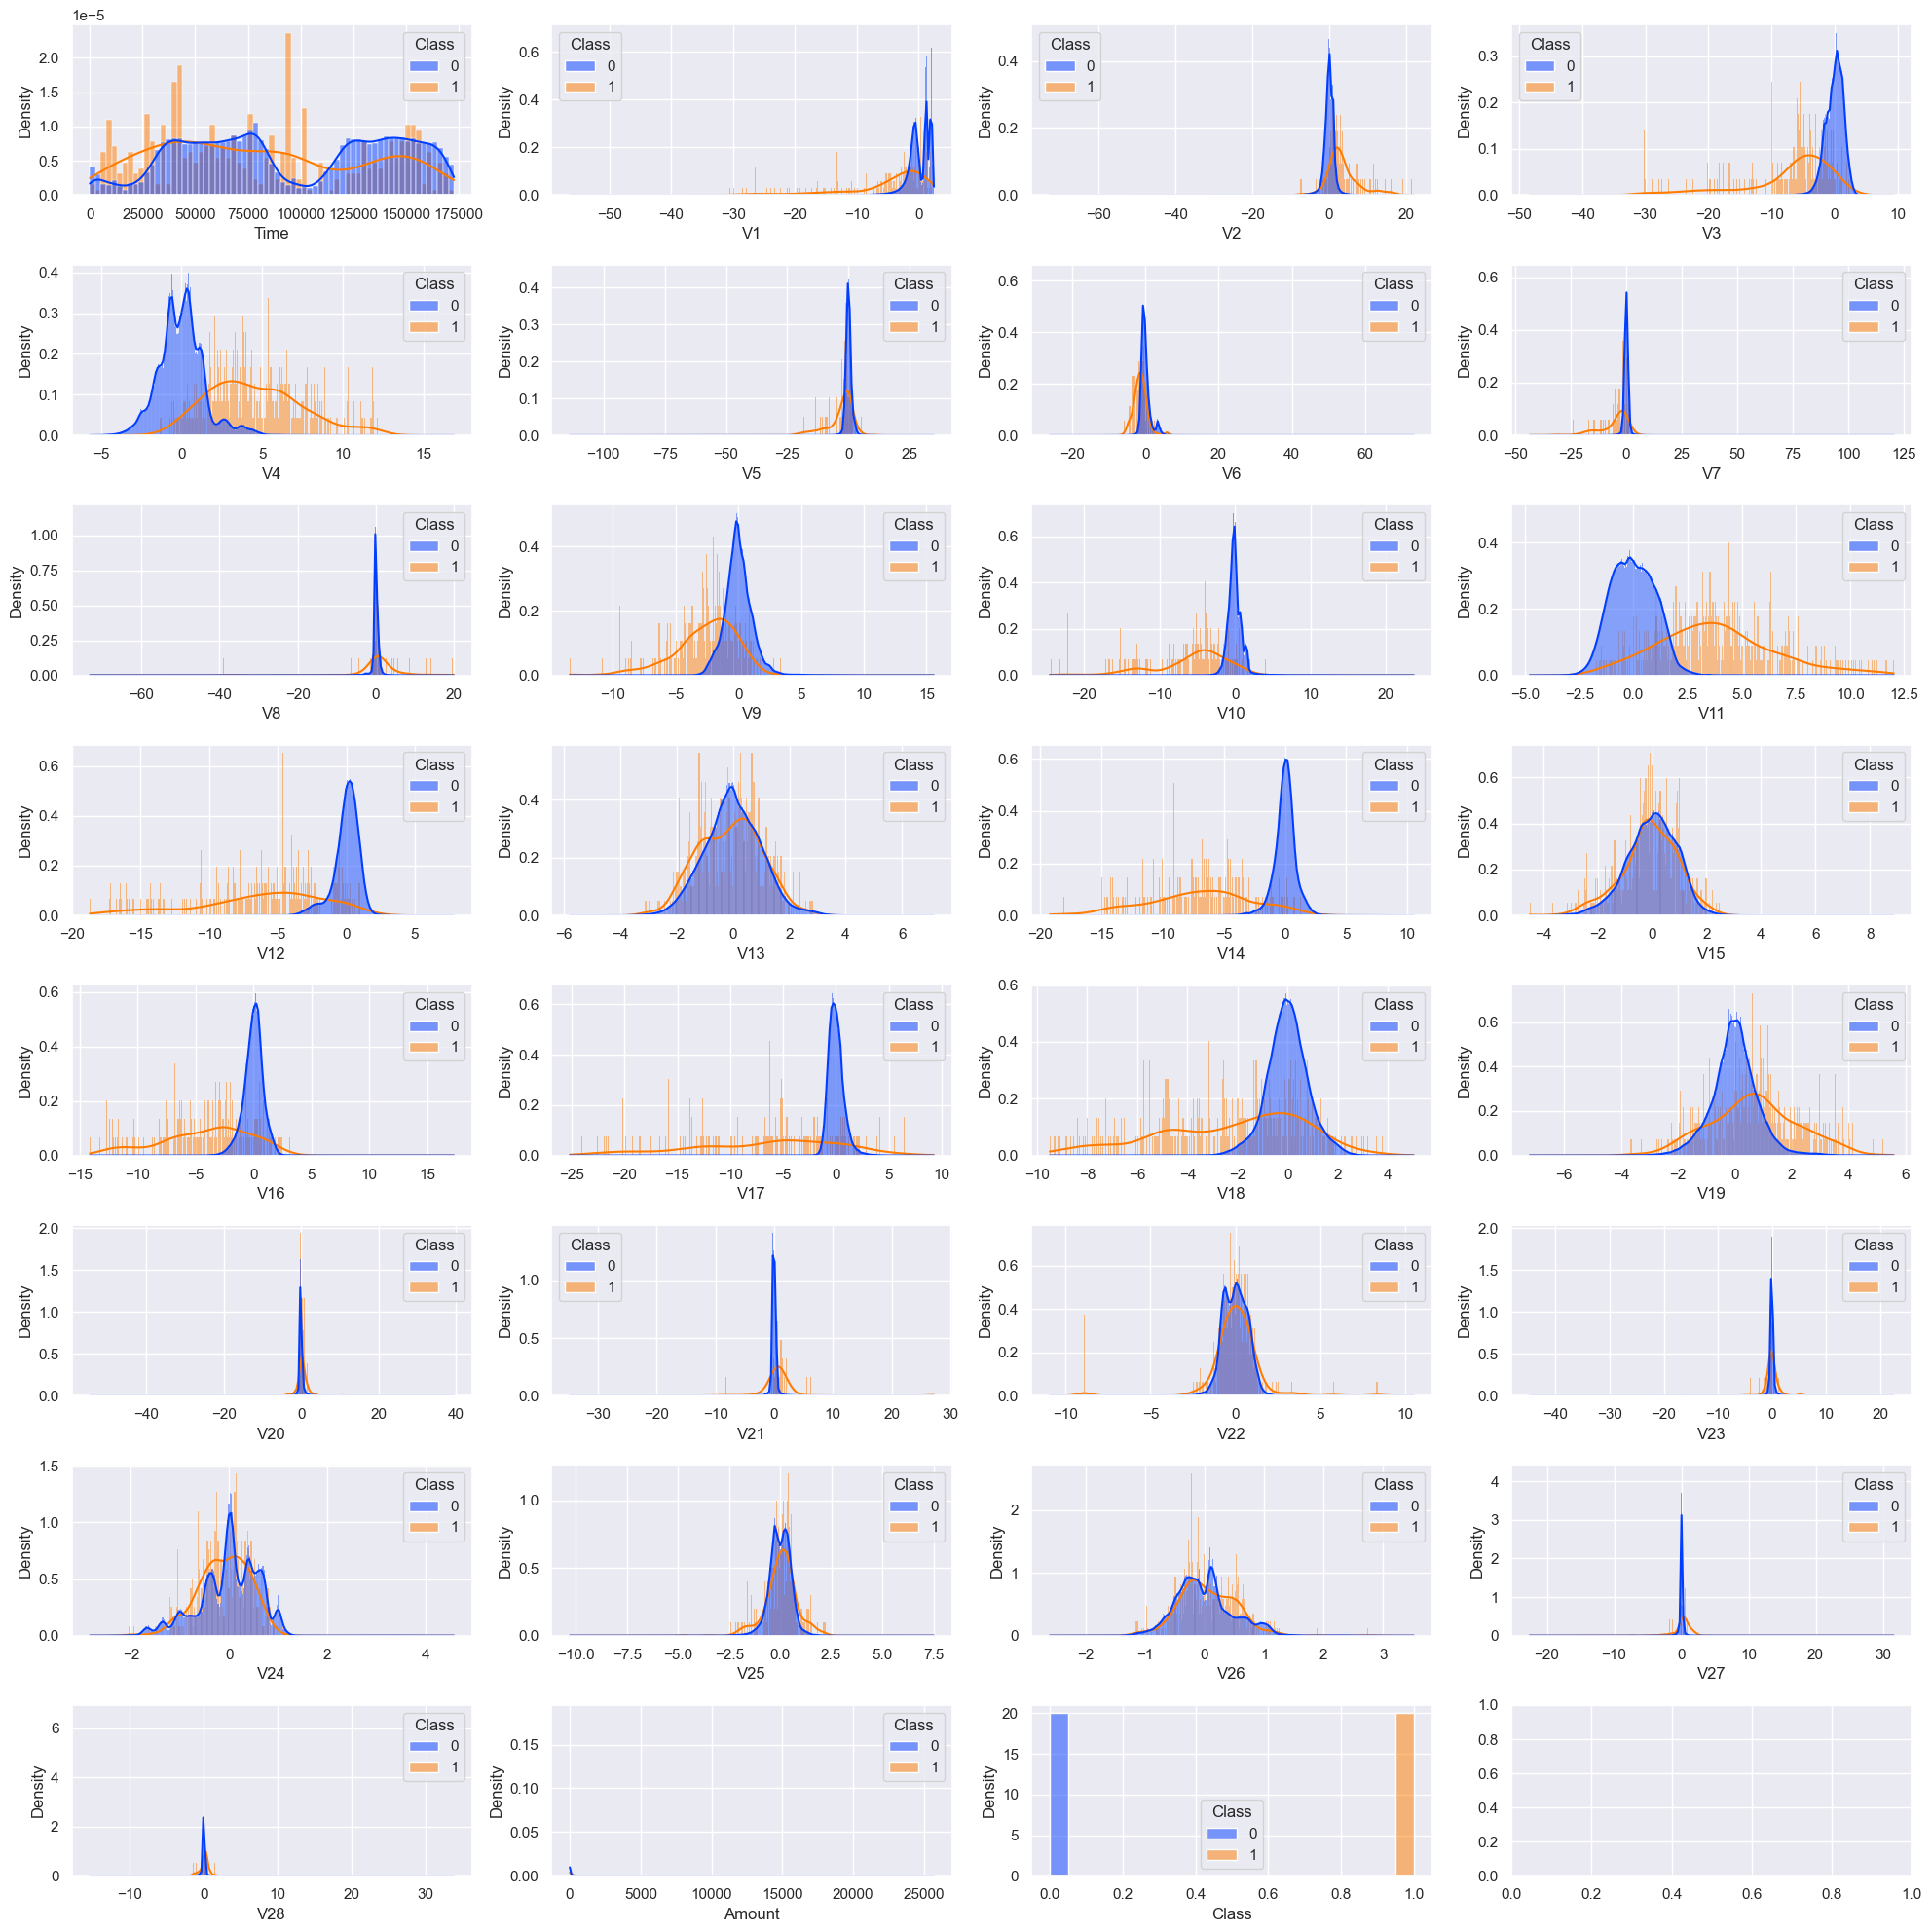

In [18]:
fig, axs = plt.subplots(8, 4, figsize=(20, 20))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.histplot(data=df, x=coluna, ax=ax, 
                 kde=True,                       # Pintndo os dados de forma diferente conforme a coluna do parametro 'hue'
                 hue='Class',                    # Separando os dados conforme coluna 'Class' que é o target
                 stat='density', 
                 common_norm=False
                 )

plt.tight_layout()

plt.show()

Como rodar o gráfico acima mais rapido? 
- Podemos diminuir a amostra dos dados com método "df.sample(n_amostras)"

In [19]:
df.groupby('Class').sample(n=450, random_state=42)         # Só não podemos deixar o n=450 maior do que o número de dados da classe minoritária

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142405,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
214662,139767.0,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,...,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54,1
252774,155965.0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77,1
243749,152058.0,-3.576362,3.299436,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363,...,0.540731,0.719526,0.379249,-0.616962,-0.442811,0.359841,-2.651825,0.422184,1.00,1


In [20]:
df.groupby('Class').sample(n=450, random_state=42)['Class'].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

In [21]:
df_sample = df.groupby('Class').sample(n=450, random_state=42)            
df_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


É muito importante ao criar o 'df_sample' usar o groupby('Class') para que os dados da classe majoritária não sejam maioria extrema, pois se isso acontecesse talvez não teriamos dados suficientes pros gráficos de histograma que eu for fazer abaixo. Veja abaixo como ficaria os dados se não usássemos o 'groupby('Class')'

In [22]:
df.sample(n=450)['Class'].value_counts()

Class
0    448
1      2
Name: count, dtype: int64

Usando o groupby('Class')

In [23]:
df_sample['Class'].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

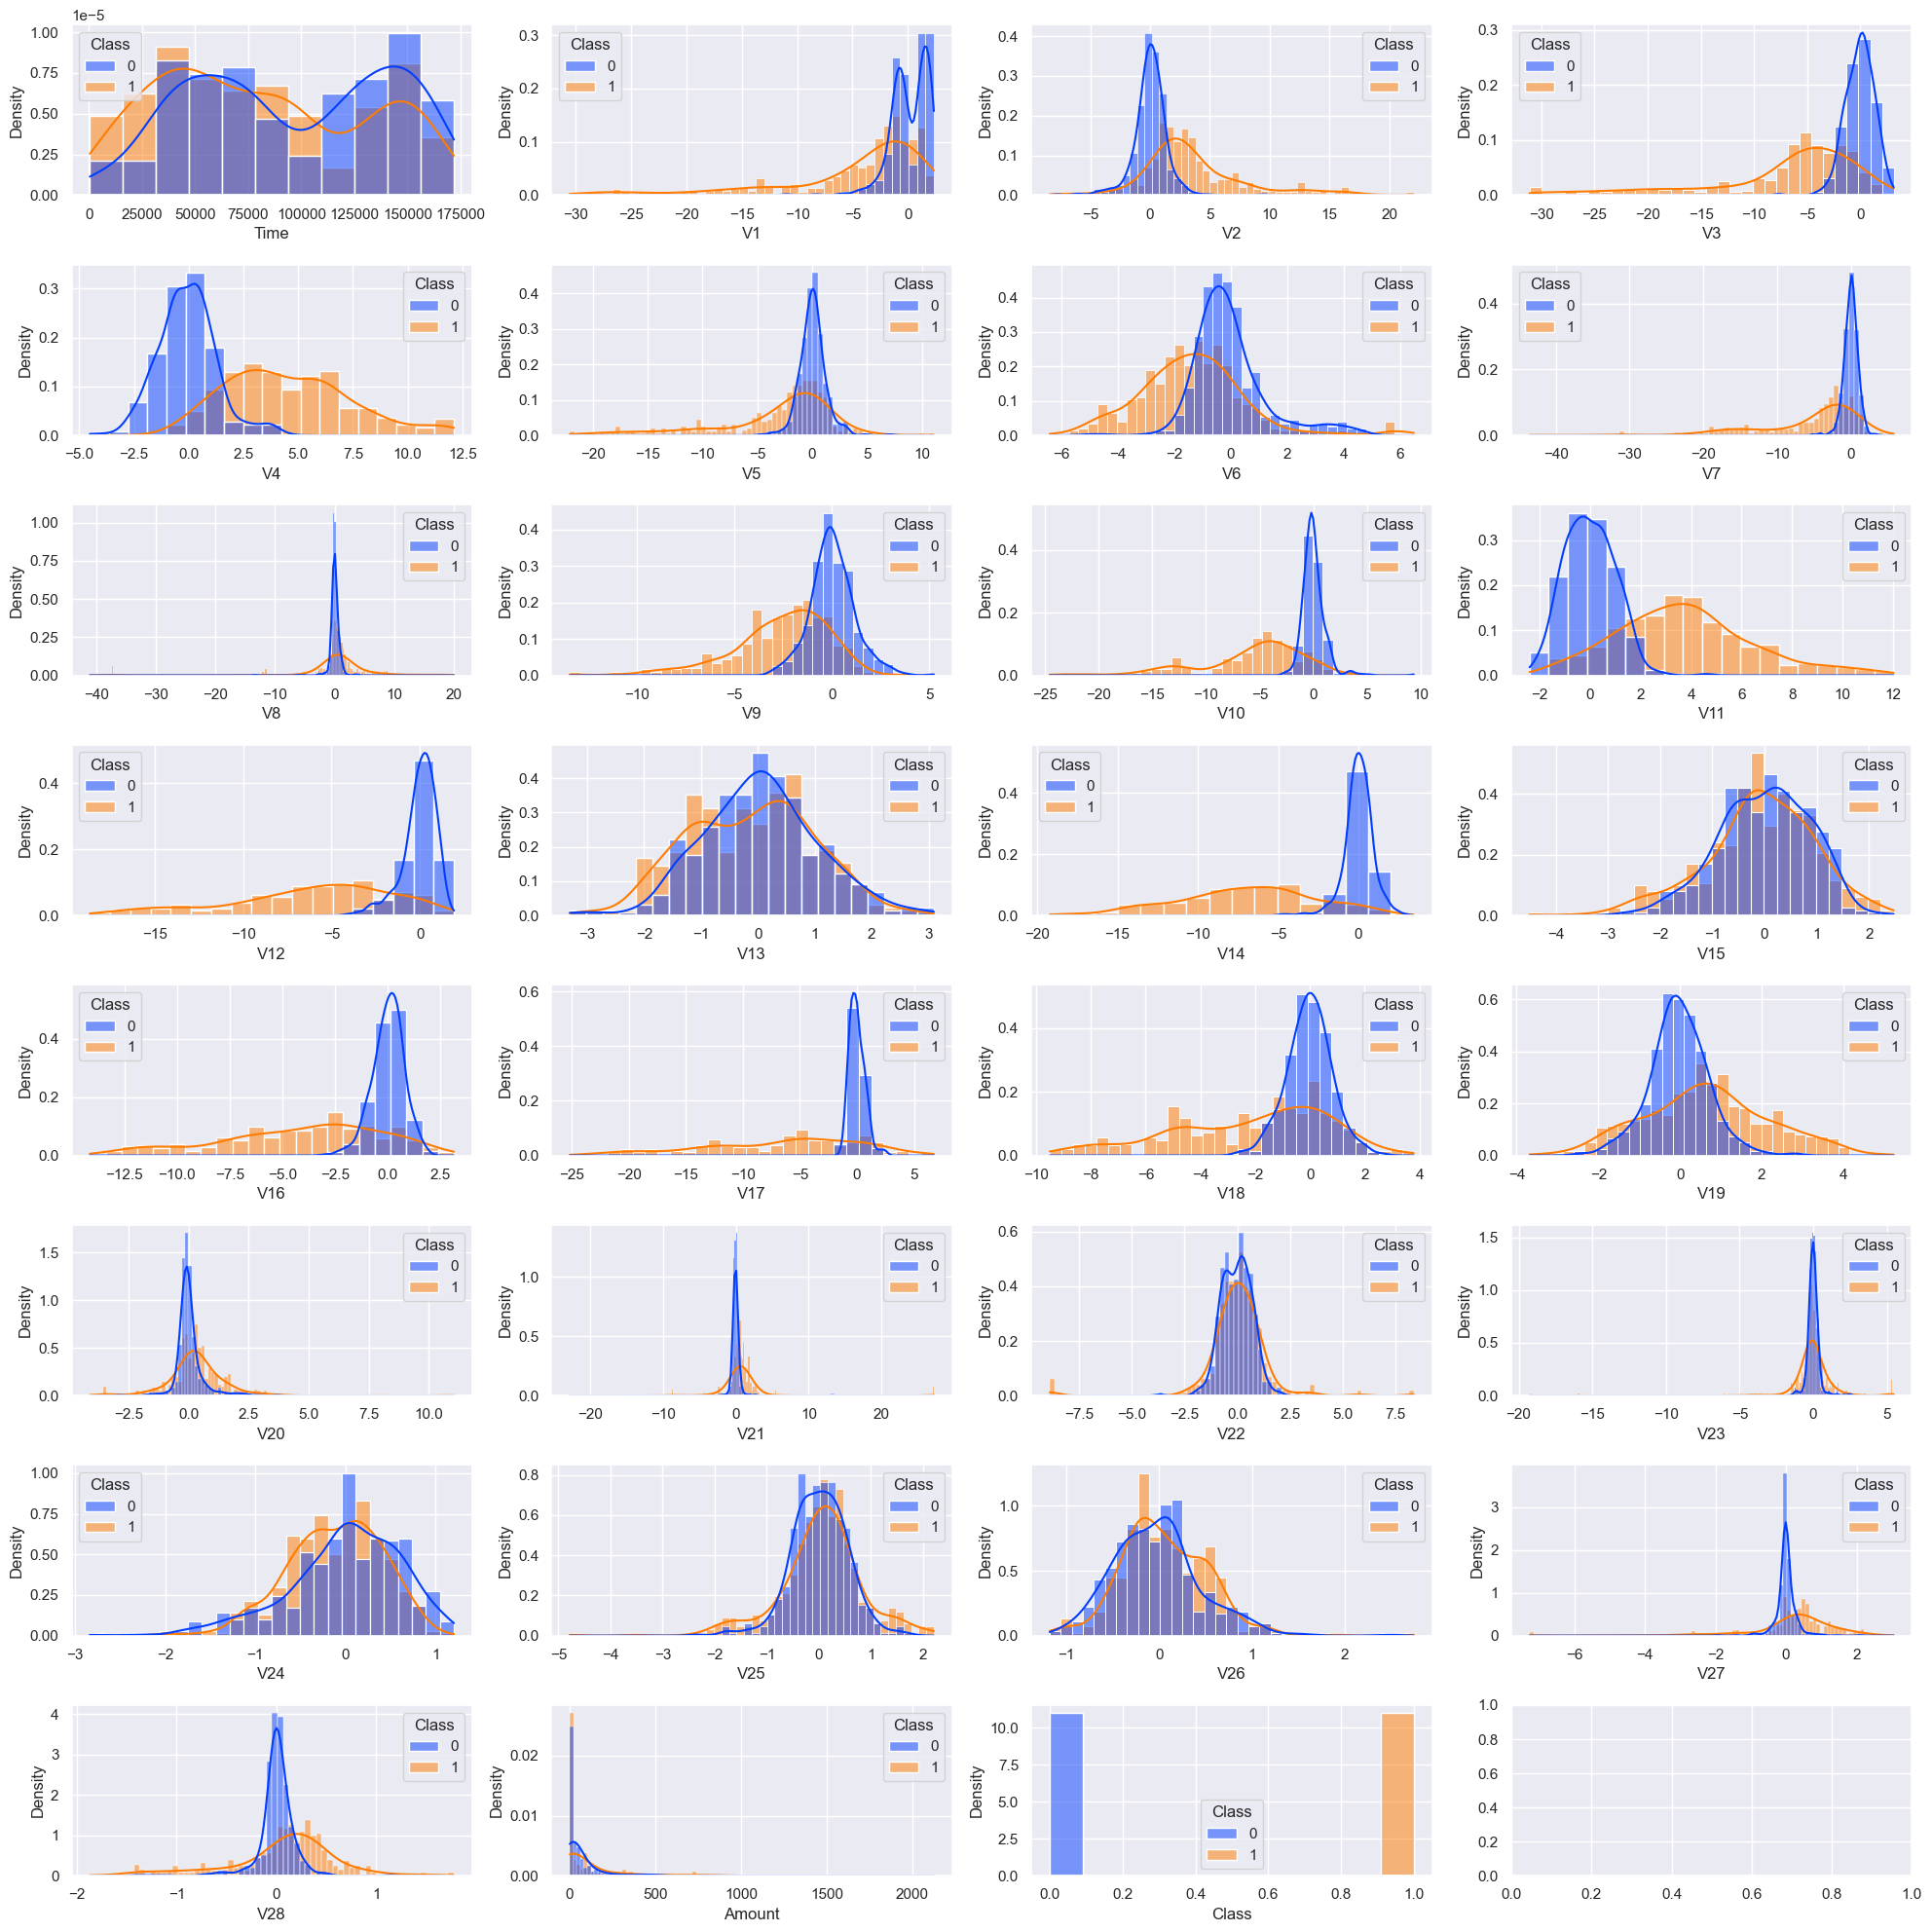

In [24]:
fig, axs = plt.subplots(8, 4, figsize=(20, 20))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.histplot(data=df_sample, x=coluna, ax=ax,           # MUDANDO PARA DF_SAMPLE
                 kde=True,                                    
                 hue='Class',                                 
                 stat='density',          # O parametro stat='density' não mostra mais a contagem dos dados, mas a densidade da área das 2 colunas junto
                 common_norm=False        # O parametro 'common_norm=False' faz com que a escala da densidade seja separado das 2 colunas 
                                            # (se não a coluna com mais dados sempre vai ser predominante)
                 )

plt.tight_layout()

plt.show()

- Coluna 'Time' tem os dados concentrados em 2 distribuições normais - é referente a 2 dias, os dados dessa coluna estão em segundos, se transformarmos em horas teremos quase 48 horas entre a primeira transação e a segunda.

- Podemos ver que muitas colunas originadas dos componentes da PCA possuem distribuição normal, com média centralizada em zero, mas com distribuição assimétrica dos dados, talvez pela presença de outliers.

- Em algumas colunas podemos perceber diferenças significativas entre a classe 0 e 1, em outras parece que seguem a mesma distribuição normal, e não devem gerar um correlação muito forte com o target.

- Coluna Amount aparenta ter grandes outliers, o que é relativamente comum quando trata-se de transações financeiras porque a maioria das transações é de menor valor, mas sempre tem algumas transações com valor expressivo (compra de um carro, por exemplo)

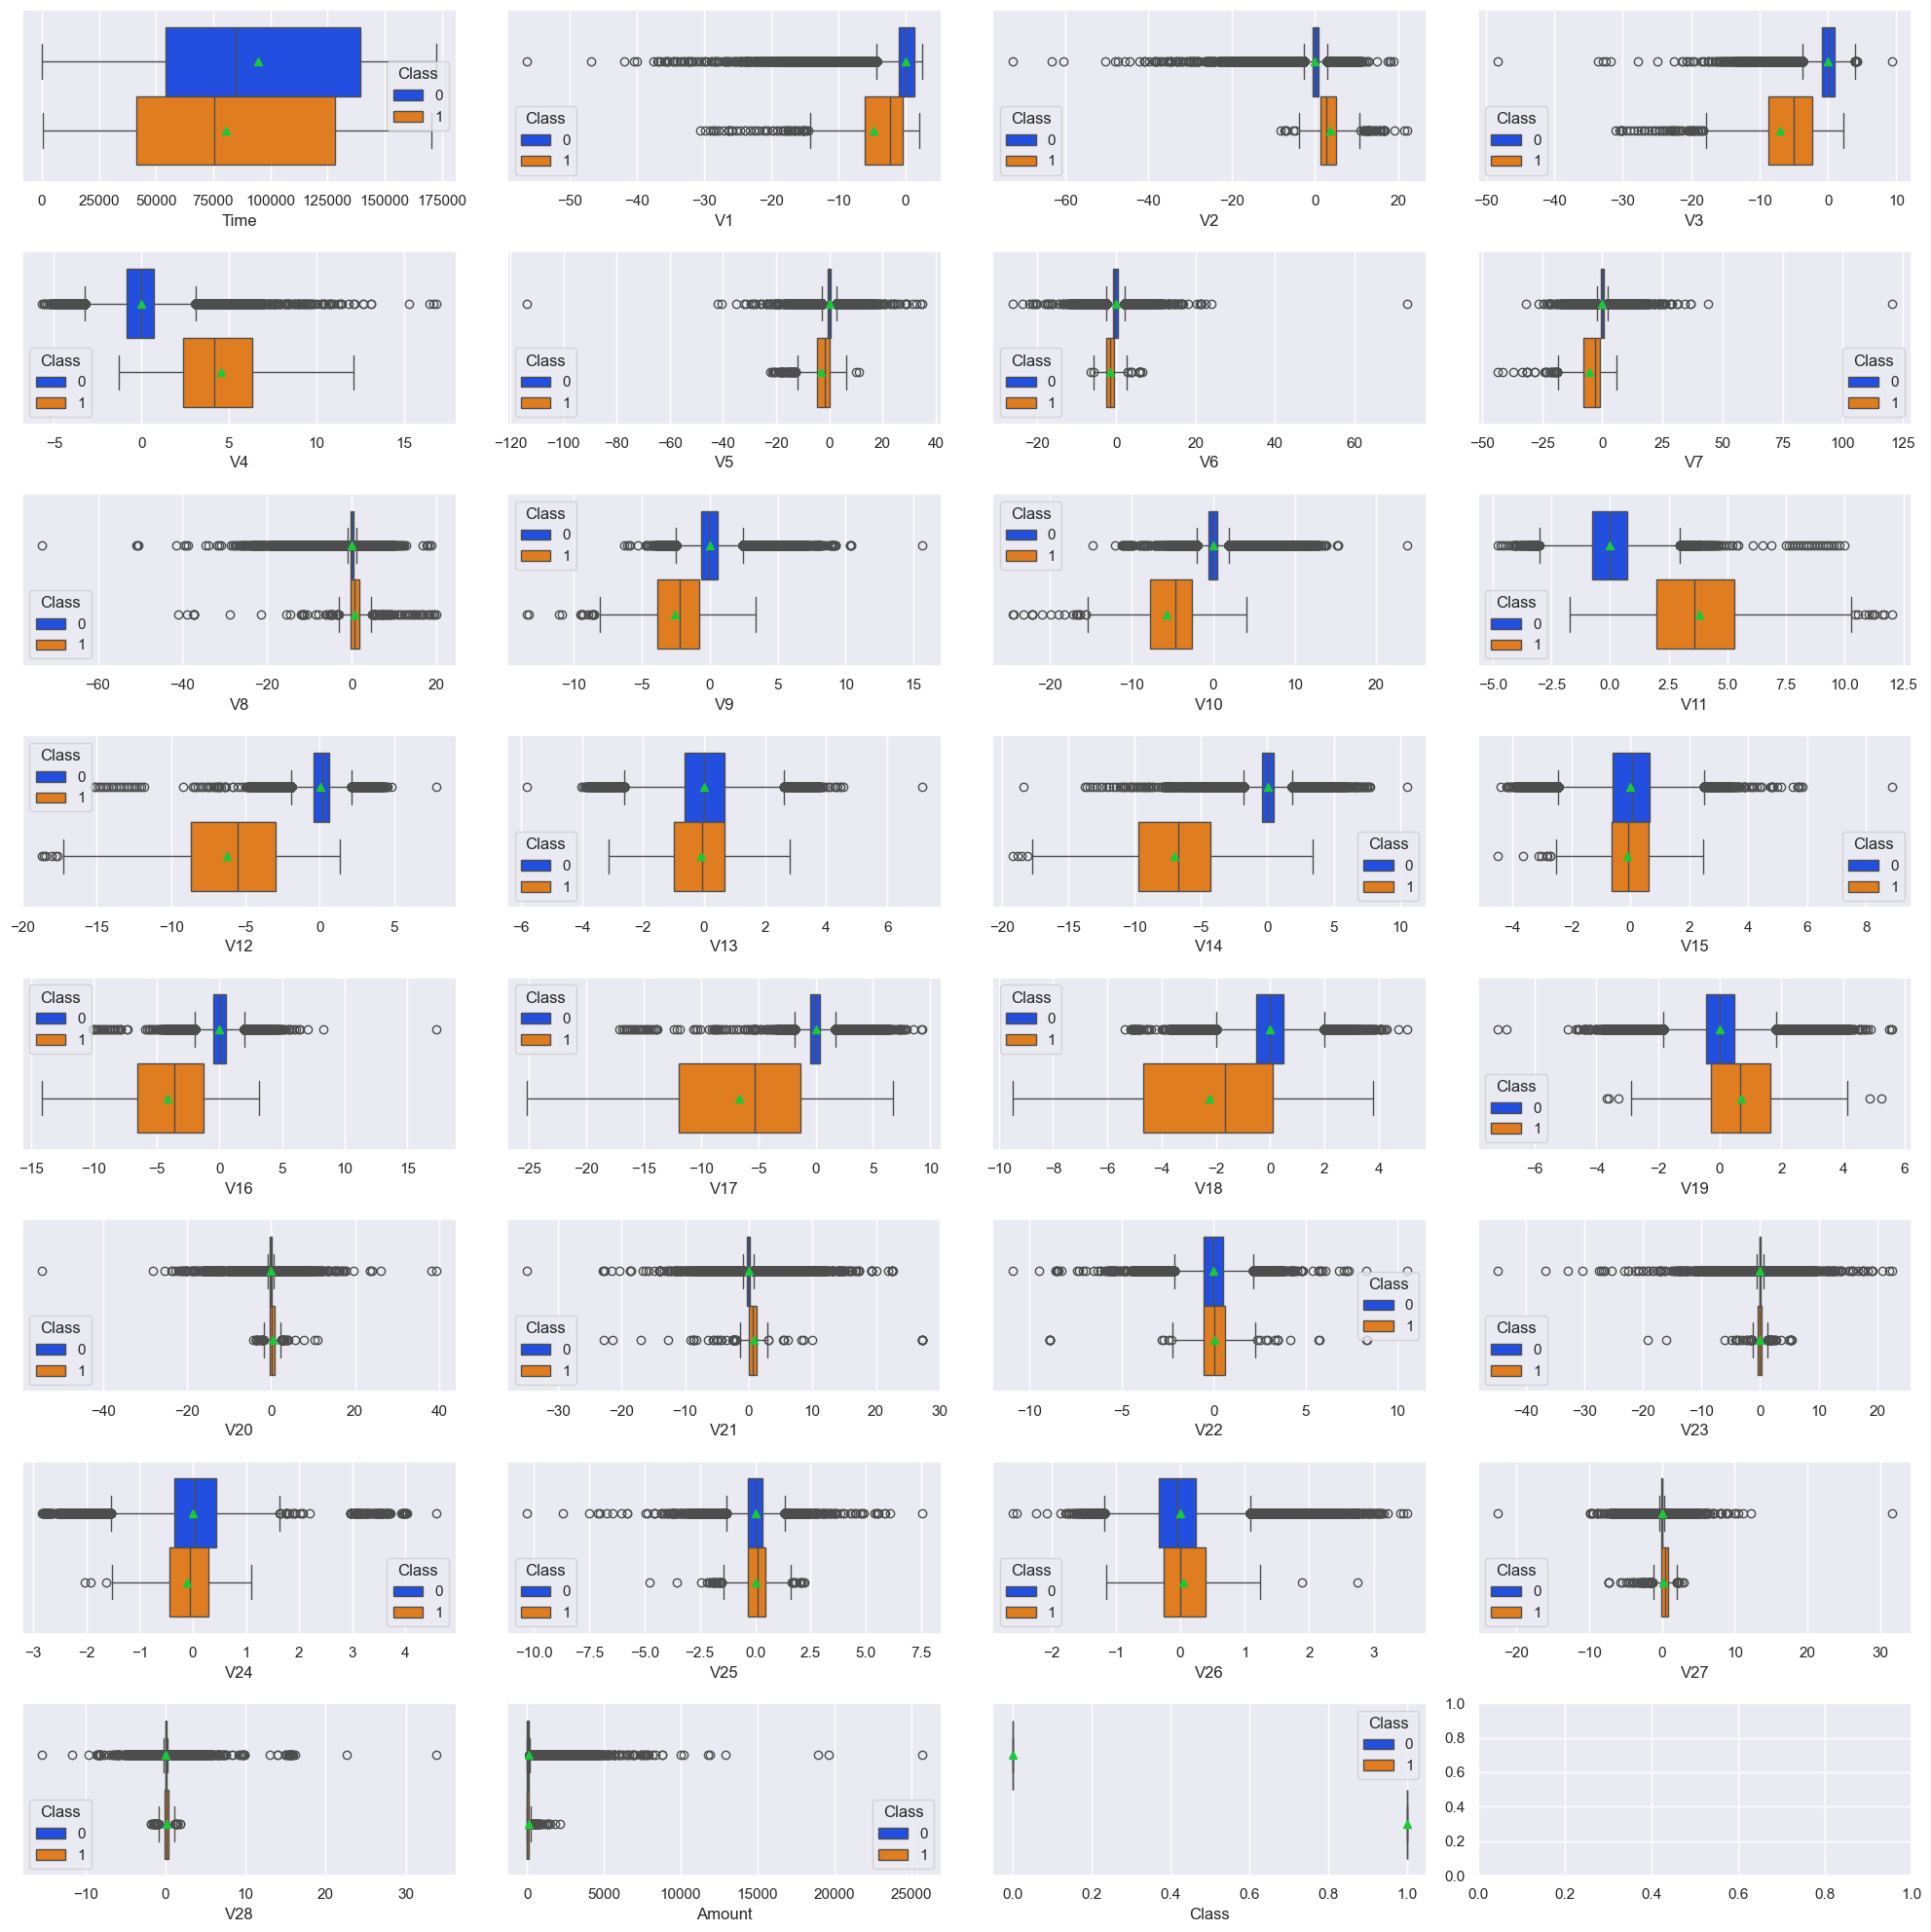

In [25]:
fig, axs = plt.subplots(8, 4, figsize=(20, 20))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True, hue='Class')

plt.tight_layout()

plt.show()

**Análises**
- É notado uma grande quantidade de outliers nos dados.
- Podemos ver mais uma vez que algumas features os dados de uma classe são iguais às outras

#### Análise de Correlação

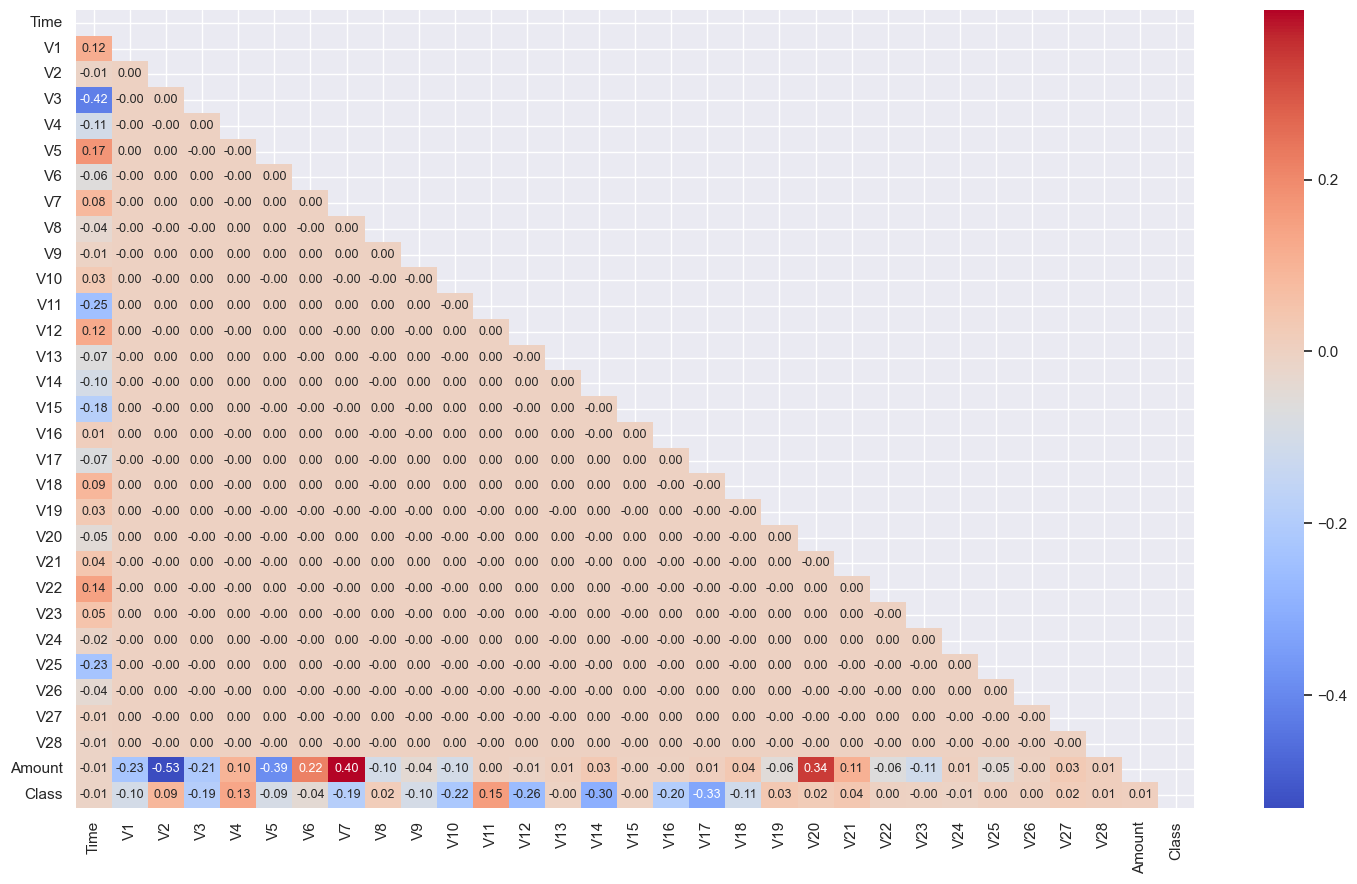

In [26]:
corr = df.select_dtypes('number').corr()
matriz = np.triu(corr)

fig, ax = plt.subplots(figsize=(15,9), tight_layout=True)

sns.heatmap(corr, mask=matriz, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'fontsize': 9})

plt.show()

**Análise de Correlações**
- Não temos correlação nenhuma nas colunas originadas de componentes de PCA (isso é característico do PCA, tenta criar colunas que não tenham relação uma com as outras)
- Mas as colunas Class, Amount e Time há certa correlação com algumas colunas do PCA
- Algumas colunas do PCA tem correlação próximo a 0 em relação à coluna 'Class' - será que precisamos manter elas na nossa base de dados?

#### Testes Estatísticos
- Com base nesses testes vamos decidir quais features vamos manter na nossa base
- Usando um teste não paramétrico (pois tem features que os dados não segue uma distribuição normal): **Teste Mann_Whitneyu**

In [27]:
features = df.columns.drop('Class').to_list()           # Todas as features que serão testadas contra o target pra sabermos se possui alguma correlação

coluna_target = 'Class'

analise_mw = {}                                         # Dicionário com o resultado do teste de hipótese para cada feature

classes = df[coluna_target].unique()

alfa = 0.01                                             # Nível de significância do teste de hipóteses

agrupamento = df.groupby(coluna_target)

In [28]:
for coluna in features:
    grupo0 = agrupamento.get_group(classes[0])[coluna]
    grupo1 = agrupamento.get_group(classes[1])[coluna]

    estatistica_mw , pvalue_mw = mannwhitneyu(grupo0, grupo1)

    analise_mw[coluna] = {
        'pvalue': pvalue_mw,
        'estatistica': estatistica_mw,
        'relacao_significativa': pvalue_mw < alfa,         # Resposta será True or False
    }

df_mw = pd.DataFrame(analise_mw).T

df_mw

,pvalue,estatistica,relacao_significativa
Time,0.0,81310602.0,True
V1,0.0,111193870.0,True
V2,0.0,20289296.0,True
V3,0.0,127583455.0,True
V4,0.0,8636598.0,True
V5,0.0,99256726.0,True
V6,0.0,107291012.0,True
V7,0.0,116915822.0,True
V8,0.0,47862020.0,True
V9,0.0,118073844.0,True


**Análise teste estatístico:**
- Onde temos pvalue < alfa devemos rejeitar a hipótese nula de que a mediana das 2 populações são iguais (a mediana da feature A para as classes 0 e 1 são iguais)
- Ou seja, para pvalue < alfa, temos variação entre os dados da classe 0 e 1
- Apenas onde pvalue é maior do que alfa que os dados das classes 0 e 1 do target são iguais e podemos desprezar do nosso projeto.

In [29]:
df_mw.query('relacao_significativa == False')

,pvalue,estatistica,relacao_significativa
V13,0.051215,73493959.0,False
V15,0.129508,72703847.0,False
V22,0.266395,67916421.0,False
V25,0.012463,65388547.0,False


- Essas 4 features podemos eliminar antes de exportar a base porque não gerar influencia nenhuma no target.

In [30]:
df = df.drop(
    columns = df_mw.query('relacao_significativa == False').index
)

df.shape

(284807, 27)

#### Tratamento dos Outliers

- Apenas para esse projeto faremos um **tratamento dos outliers apenas na classe majoritária**, pois na classe minoritária temos apenas 492 registros.
- Essa é uma prática pouco comum, e só estamos adotando **porque temos um desbalaceamento muito severo** (classe minoritária é só 0.17% - menos de 1% dos dados totais)
- Perder mais pontos da classe minoritária, mesmo que outliers, atrapalharia mais os modelos de machine learning do que ajudaria.

In [31]:
df_majoritaria = df[df['Class'] == 0]
df_minoritaria = df[df['Class'] == 1]

df_majoritaria.shape, df_minoritaria.shape

((284315, 27), (492, 27))

**Critério para eliminar outliers:** 
- Quantil inferior ( < 5%)
- Quantil superior (> 95%)

In [32]:
def remover_outliers_quantil(df, variaveis, quantil_inferior=0.05, quantil_superior=0.95):
    df_filtrado = df.copy()
    
    for variavel in variaveis:
        limite_inf = df[variavel].quantile(quantil_inferior)
        limite_sup = df[variavel].quantile(quantil_superior)
        df_filtrado = df[ (df[variavel] >= limite_inf) & (df[variavel] <= limite_sup) ]
    
    return df_filtrado

In [33]:
variaveis = df.columns.drop('Class')

df_majoritaria_filtrado = remover_outliers_quantil(df_majoritaria, variaveis)

df_majoritaria_filtrado.shape      # Veja que o shape diminuiu de 284315 linhas para 256088 linhas (28 mil registros deletados de outliers)

(256088, 27)

In [34]:
df_sem_outliers = pd.concat([df_majoritaria_filtrado, df_minoritaria])
df_sem_outliers.shape

(256580, 27)

In [35]:
df_sem_outliers = df_sem_outliers.reset_index(drop=True)
df_sem_outliers.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V23,V24,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,-0.110474,0.066928,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,0.101288,-0.339846,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,-0.190321,-1.175575,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,-0.137458,0.141267,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.033194,0.084968,-0.208254,-0.026398,-0.371427,0.105915,0.253844,0.081080,3.67,0


In [36]:
df_sem_outliers['Class'].value_counts(normalize=True)

Class
0    0.998082
1    0.001918
Name: proportion, dtype: float64

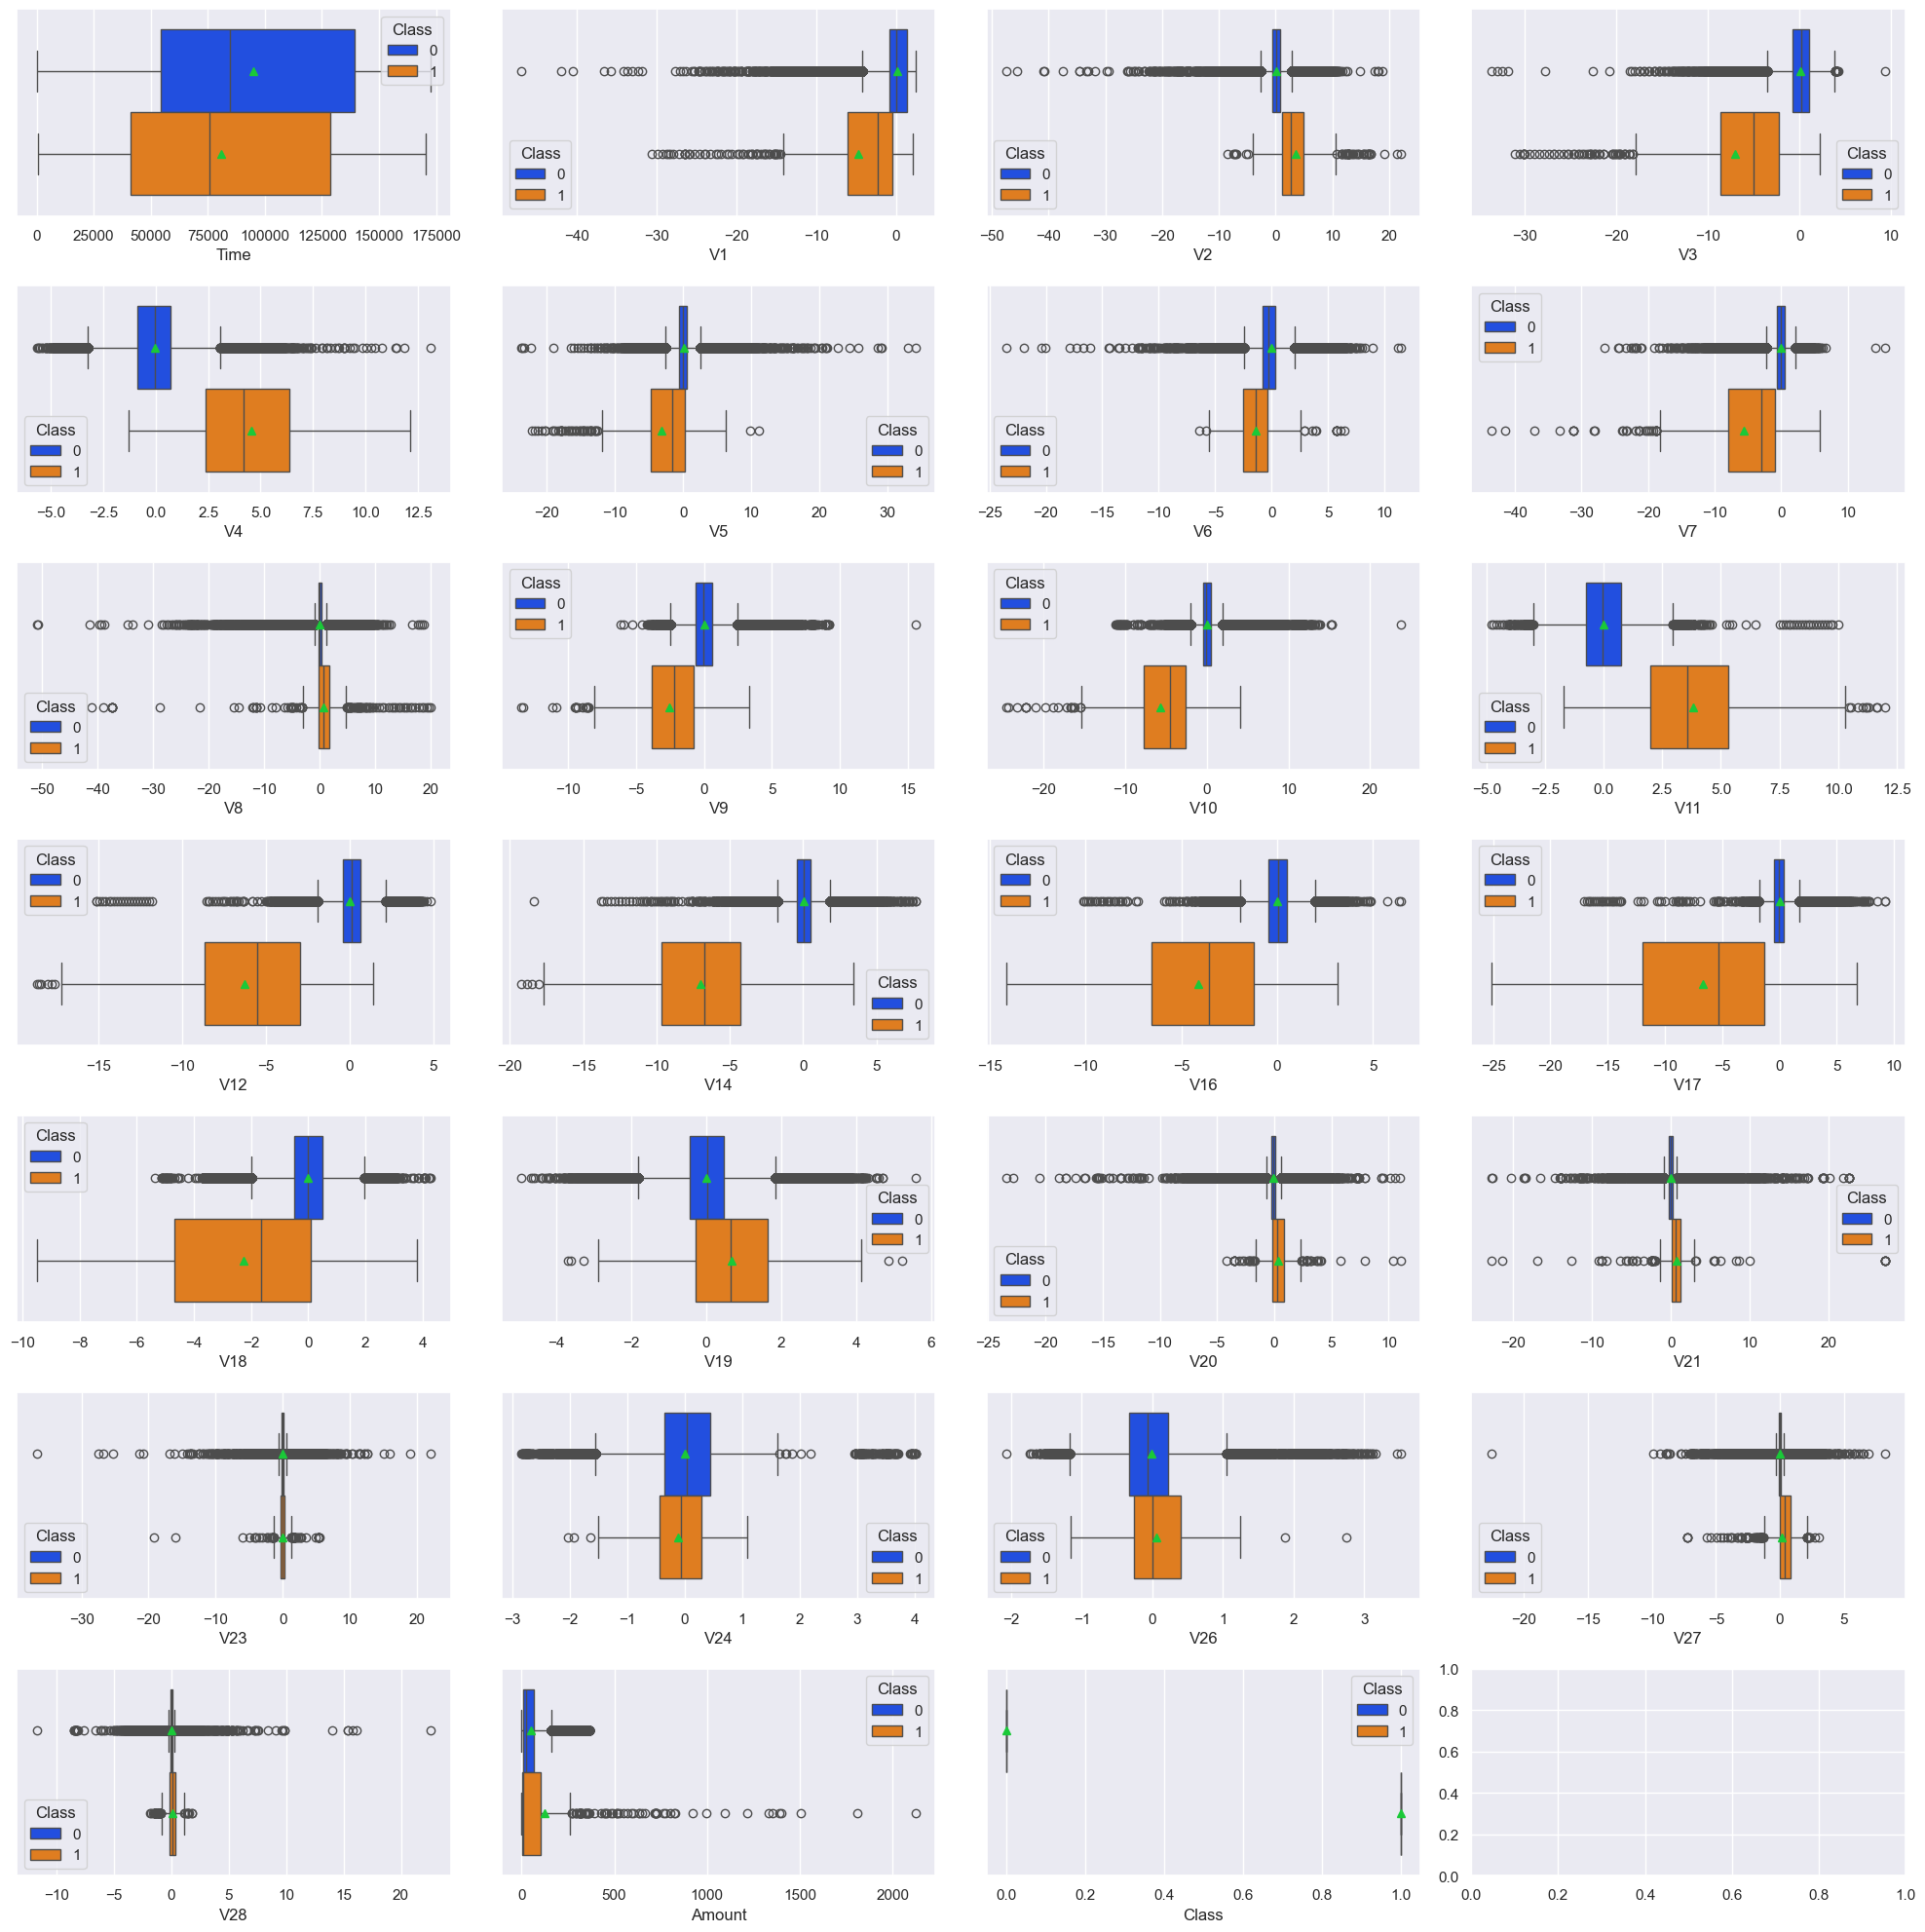

In [37]:
fig, axs = plt.subplots(7, 4, figsize=(20, 20))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df_sem_outliers, x=coluna, ax=ax, showmeans=True, hue='Class')

plt.tight_layout()

plt.show()

#### Exportando a base tratada

In [38]:
df_sem_outliers.to_parquet(DADOS_TRATADOS, index=False)